# Unsupervised Learning Using K-Means Clustering on California Housing Data

## Fetch the dataset

In [43]:
import pandas as pd
housing = pd.read_csv('datasets/housing.csv')

In [44]:
features = ['longitude', 'latitude', 'median_income']
housing_selected = housing[features]

In [45]:
housing_selected.head()

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


## Preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [47]:
scaler = StandardScaler()
housing_selected_scaled = scaler.fit_transform(housing_selected)

In [48]:
housing_selected_scaled

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -1.14259331],
       [-0.87362627,  1.77823747, -1.05458292],
       [-0.83369581,  1.75014627, -0.78012947]])

## Apply K-Means Clustering on the California Housing Dataset based on median_income

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
ypred = kmeans.fit(housing_selected_scaled)

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Optimize the number of clusters

In [50]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [162]:
silhouette_scores = []
cluster_range = range(2, 15)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(housing_selected_scaled)  
    score = silhouette_score(housing_selected_scaled, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

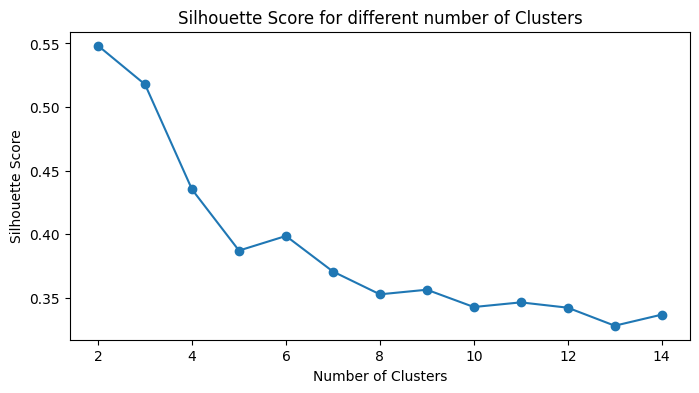

In [164]:
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different number of Clusters")
plt.show()

In [175]:
silhouette_scores

[0.5482253273989484,
 0.5177273144600426,
 0.4350793985198938,
 0.3869631777718812,
 0.3984653534071962,
 0.37047384460028376,
 0.35251857347512683,
 0.3561535814584722,
 0.3425363115474956,
 0.3461909957307204,
 0.3420030347825916,
 0.3278117159187526,
 0.33654005557024674]

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

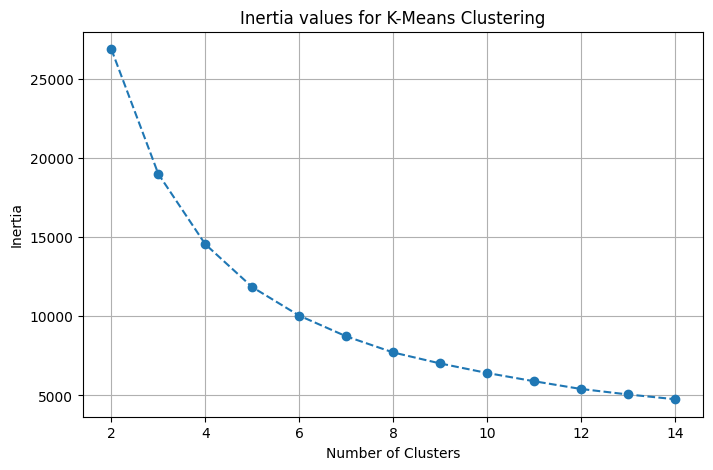

In [176]:
inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(housing_selected_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia values for K-Means Clustering')
plt.grid(True)
plt.show()

## Visualize the clusters

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

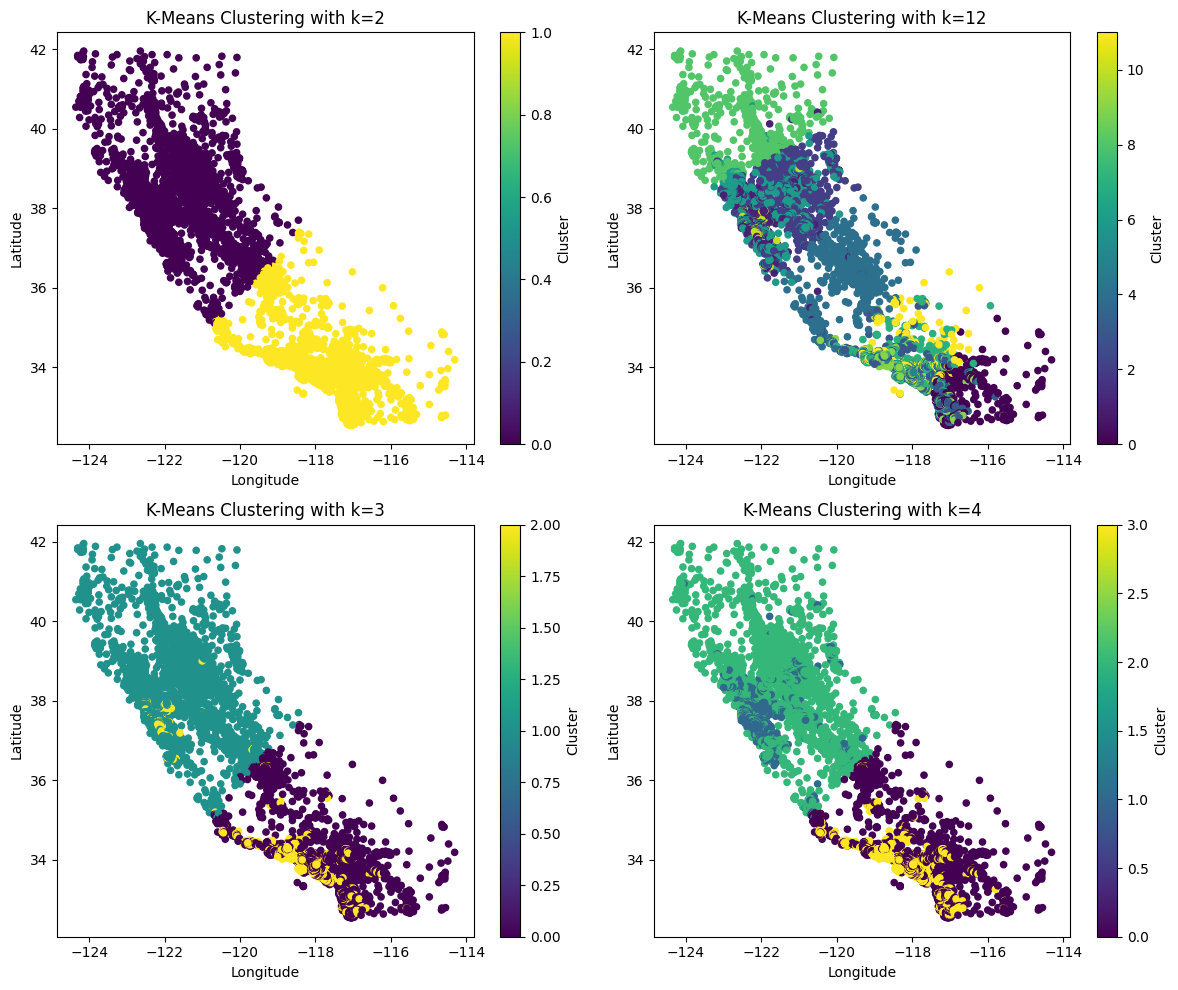

In [208]:
k_values = [2,12, 3, 4]


plt.figure(figsize=(12, 10))
for i, k in enumerate(k_values, 1):
    
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(housing_selected_scaled)
    
    
    plt.subplot(2, 2, i)
    plt.scatter(housing_selected['longitude'], housing_selected['latitude'], c=clusters, cmap='viridis', s=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'K-Means Clustering with k={k}')
    plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

In [189]:
housing_selected_income = housing_selected.copy()
housing_selected_income

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462
...,...,...,...
20635,-121.09,39.48,1.5603
20636,-121.21,39.49,2.5568
20637,-121.22,39.43,1.7000
20638,-121.32,39.43,1.8672


In [200]:
kmeans_income = KMeans(n_clusters=2, random_state=0)
housing_selected_income['k2'] = kmeans_income.fit_predict(housing_selected_scaled)

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 400x200 with 0 Axes>

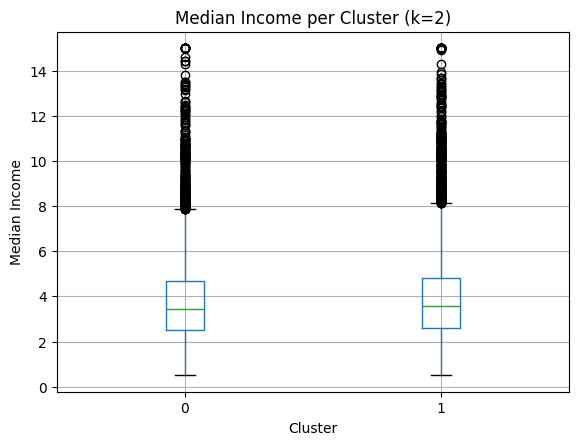

In [201]:
plt.figure(figsize=(4, 2))
housing_selected_income.boxplot(column='median_income', by='k2')
plt.title('Median Income per Cluster (k=2)')
plt.suptitle('')
plt.xlabel('Cluster')
plt.ylabel('Median Income')
plt.show()

In [192]:
kmeans_income = KMeans(n_clusters=4, random_state=0)
housing_selected_income['k4'] = kmeans_income.fit_predict(housing_selected_scaled)

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 400x200 with 0 Axes>

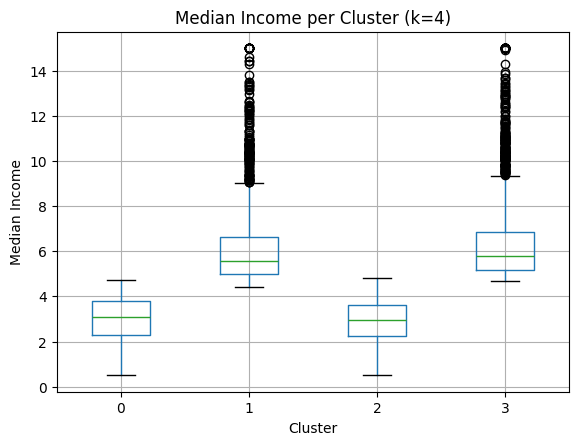

In [196]:
plt.figure(figsize=(4, 2))
housing_selected_income.boxplot(column='median_income', by='k4')
plt.title('Median Income per Cluster (k=4)')
plt.suptitle('')
plt.xlabel('Cluster')
plt.ylabel('Median Income')
plt.show()

## DBSCAN

In [88]:
from sklearn.cluster import DBSCAN

In [86]:
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = [2, 3, 5, 10, 15, 20, 25, 30, 40]

In [89]:
results = pd.DataFrame(index=min_samples_values, columns=eps_values)

In [90]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(housing_selected_scaled)
        
        
        if len(set(labels)) > 1:  
            score = silhouette_score(housing_selected_scaled, labels)
        else:
            score = -1  
            
        results.at[min_samples, eps] = score  


results = results.astype(float)

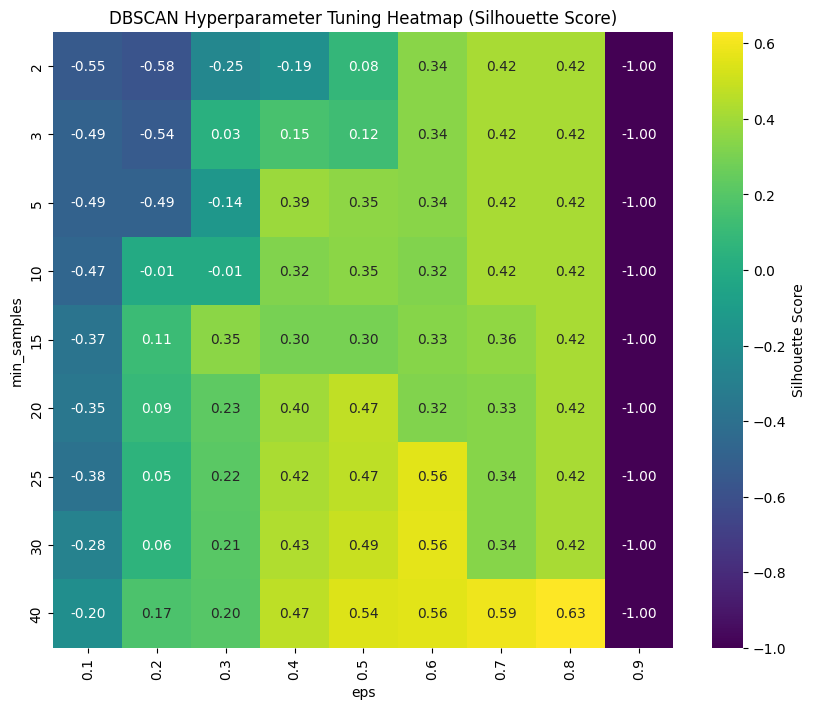

In [94]:
import seaborn as sns
eps_values = np.round(np.arange(0.1, 1.0, 0.1), 2) 
plt.figure(figsize=(10, 8))
sns.heatmap(results, annot=True, cmap="viridis", fmt=".2f", cbar_kws={'label': 'Silhouette Score'})
plt.title('DBSCAN Hyperparameter Tuning Heatmap (Silhouette Score)')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.xticks(ticks=np.arange(len(eps_values)) + 0.5, labels=eps_values)
plt.show()

## Plot best DBSCAN cluster

In [100]:
dbscan = DBSCAN(eps=0.8, min_samples=40)
dbscan_labels = dbscan.fit_predict(housing_selected_scaled)

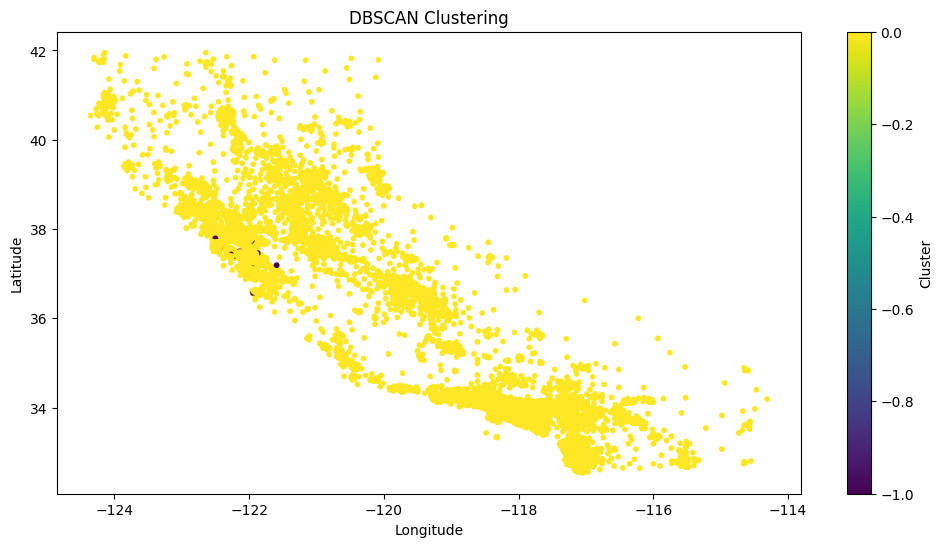

In [157]:

plt.figure(figsize=(12, 6))

plt.scatter(housing['longitude'], housing['latitude'], c=dbscan_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Cluster')
plt.show()

In [154]:
label_counts = pd.Series(dbscan_labels).value_counts()

In [155]:
label_counts

 0    20620
-1       20
Name: count, dtype: int64